# 第8部　正規線形モデル

## 2章　正規線形モデルの評価

### 分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats
# 表示桁数の設定
pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [3]:
# データの読み込み
beer = pd.read_csv('8-1-1-beer.csv')

# モデル化
lm_model = smf.ols(formula='beer ~ temperature', 
                   data=beer).fit()

### 実装：残差の取得

In [4]:
# 残差の取得
e = lm_model.resid
e.head(3)

0   -5.001
1    5.554
2   -1.864
dtype: float64

In [5]:
# 当てはめ値の計算
beta0 = lm_model.params[0] # 切片
beta1 = lm_model.params[1] # 傾き

y_hat = beta0 + beta1 * beer.temperature # 当てはめ値
y_hat.head(3)

0    50.301
1    53.746
2    42.264
Name: temperature, dtype: float64

In [6]:
# 参考：当てはめ値の取得(書籍には載っていないコードです)
lm_model.fittedvalues.head(3)

0    50.301
1    53.746
2    42.264
dtype: float64

In [7]:
# 当てはめ値から残差を求める
(beer.beer - y_hat).head(3)

0   -5.001
1    5.554
2   -1.864
dtype: float64

### 実装：決定係数

In [8]:
# 決定係数
y = beer.beer              # 応答変数y
y_bar = np.mean(y)         # yの平均値
y_hat = lm_model.predict() # yの当てはめ値

round(np.sum((y_hat - y_bar)**2) / np.sum((y - y_bar)**2), 3)

0.504

In [9]:
round(lm_model.rsquared, 3)

0.504

In [10]:
round(np.sum((y_hat - y_bar)**2) + sum(e**2), 3)

3277.115

In [11]:
round(np.sum((y - y_bar)**2), 3)

3277.115

In [12]:
# 決定係数の別の求め方
round(1 - np.sum(e**2) / np.sum((y - y_bar)**2), 3)

0.504

### 実装：自由度調整済み決定係数

In [13]:
n = len(beer.beer) # サンプルサイズ
d = 1              # 説明変数の数
r2_adj = 1 - ((np.sum(e**2) / (n - d - 1)) / 
    (np.sum((y - y_bar)**2) / (n - 1)))
round(r2_adj, 3)

0.486

In [14]:
round(lm_model.rsquared_adj, 3)

0.486

### 実装：残差の可視化

<AxesSubplot:ylabel='Count'>

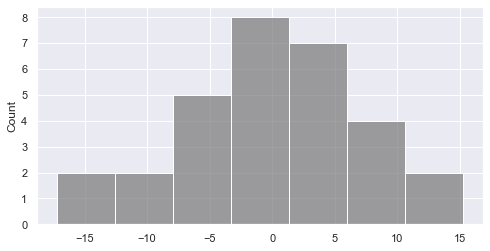

In [15]:
# 残差のヒストグラム
sns.histplot(e, color='gray')

<AxesSubplot:>

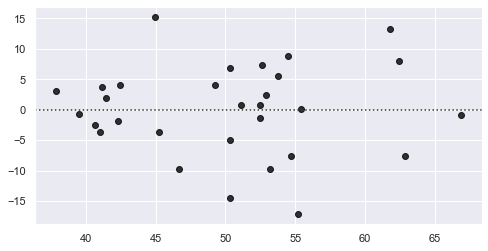

In [16]:
# 残差の散布図
sns.residplot(x=lm_model.fittedvalues, y=e, color='black')

### 実装：Q-Qプロット

In [17]:
# ワーニングが出ることがありますが、動作に影響はありません
# やや煩わしいので、ワーニングを出さない設定をしておきました
import warnings
warnings.filterwarnings('ignore')

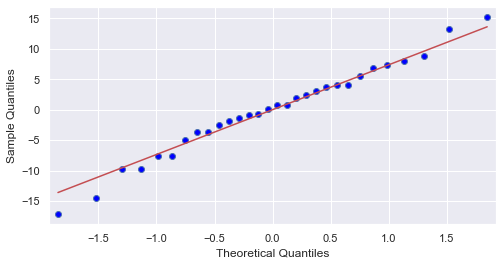

In [18]:
# Q-Qプロット
fig = sm.qqplot(e, line='s')

In [19]:
# 小さいものから順番に並び替え
e_sort = e.sort_values()
e_sort.head(n=3)

3    -17.200
21   -14.501
12    -9.710
dtype: float64

In [20]:
# 最も小さな値は全体の下位●％に位置する
round(1 / 31, 3)

0.032

In [21]:
# サンプルサイズだけ、0~1の範囲を区切る
# これが理論上の累積確率となる
nobs = len(e_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226,
       0.258, 0.29 , 0.323, 0.355, 0.387, 0.419, 0.452,
       0.484, 0.516, 0.548, 0.581, 0.613, 0.645, 0.677,
       0.71 , 0.742, 0.774, 0.806, 0.839, 0.871, 0.903,
       0.935, 0.968])

In [22]:
# 累積確率に対応するパーセント点
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865,
       -0.753, -0.649, -0.552, -0.46 , -0.372, -0.287,
       -0.204, -0.122, -0.04 ,  0.04 ,  0.122,  0.204,
        0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

<AxesSubplot:>

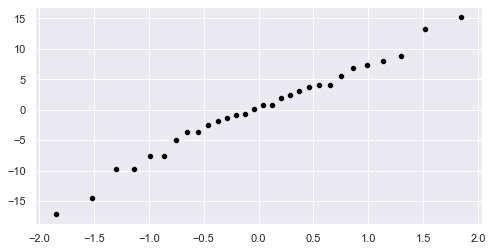

In [23]:
# 参考：理論上のパーセント点と実際の残差をプロットするとQ-Qプロットになる(書籍には載っていないコードです)
sns.scatterplot(x=ppf, y=e_sort,  color='black')

### 実装：summary関数の出力で見る残差のチェック

In [24]:
# 推定結果の表示
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.11e-05
Time:                        15:40:37   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""